In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
%matplotlib inline
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


<h1> 3x3 kernel and 3 layered CNN using Adadelta

In [6]:
model1 = Sequential()
model1.add(Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape=input_shape))   
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))   
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(64,kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(num_classes, activation='softmax'))
model1.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
history=model1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score1= model1.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:',score1[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 35s 583us/step - loss: 0.7067 - acc: 0.7671 - val_loss: 0.1405 - val_acc: 0.9541
Epoch 2/12
60000/60000 [==============================] - 34s 570us/step - loss: 0.2618 - acc: 0.9209 - val_loss: 0.1019 - val_acc: 0.9679
Epoch 3/12
60000/60000 [==============================] - 34s 572us/step - loss: 0.2060 - acc: 0.9372 - val_loss: 0.0843 - val_acc: 0.9727
Epoch 4/12
60000/60000 [==============================] - 35s 577us/step - loss: 0.1785 - acc: 0.9455 - val_loss: 0.0719 - val_acc: 0.9771
Epoch 5/12
60000/60000 [==============================] - 34s 567us/step - loss: 0.1591 - acc: 0.9510 - val_loss: 0.0655 - val_acc: 0.9790
Epoch 6/12
60000/60000 [==============================] - 34s 561us/step - loss: 0.1495 - acc: 0.9542 - val_loss: 0.0615 - val_acc: 0.9800
Epoch 7/12
60000/60000 [==============================] - 34s 573us/step - loss: 0.1343 - acc: 0.9596 - val_loss: 0.

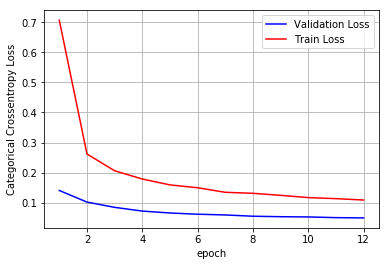

In [9]:
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h1>5 Layer CNN with 5x5 kernel

In [23]:
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=5,input_shape=(28, 28, 1), activation = 'relu',padding='same'))
model2.add(MaxPooling2D(2,2))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Conv2D(32, kernel_size=5, activation = 'relu',padding='same'))
model2.add(MaxPooling2D(2,2))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Conv2D(64, kernel_size=5,activation = 'relu',padding='same'))
model2.add(MaxPooling2D(2,2))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Conv2D(64, kernel_size=5,activation = 'relu',padding='same'))
model2.add(MaxPooling2D(2,2))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Conv2D(128, kernel_size=3, activation = 'relu',padding='same'))
model2.add(BatchNormalization())
model2.add(Flatten())
model2.add(Dense(256, activation = "relu"))
model2.add(Dropout(0.4))
model2.add(Dense(128,activation = "relu"))
model2.add(Dropout(0.4))
model2.add(Dense(10, activation = "softmax"))
model2.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
history2=model2.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score2 = model2.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 177s 3ms/step - loss: 0.5580 - acc: 0.8207 - val_loss: 0.0894 - val_acc: 0.9754
Epoch 2/12
60000/60000 [==============================] - 176s 3ms/step - loss: 0.1541 - acc: 0.9588 - val_loss: 0.0786 - val_acc: 0.9800
Epoch 3/12
60000/60000 [==============================] - 178s 3ms/step - loss: 0.1158 - acc: 0.9693 - val_loss: 0.0411 - val_acc: 0.9887
Epoch 4/12
60000/60000 [==============================] - 182s 3ms/step - loss: 0.0995 - acc: 0.9733 - val_loss: 0.0337 - val_acc: 0.9912
Epoch 5/12
60000/60000 [==============================] - 181s 3ms/step - loss: 0.0879 - acc: 0.9775 - val_loss: 0.0318 - val_acc: 0.9915
Epoch 6/12
60000/60000 [==============================] - 181s 3ms/step - loss: 0.0775 - acc: 0.9795 - val_loss: 0.0293 - val_acc: 0.9923
Epoch 7/12
60000/60000 [==============================] - 181s 3ms/step - loss: 0.0770 - acc: 0.9798 - val_loss: 0.0266 -

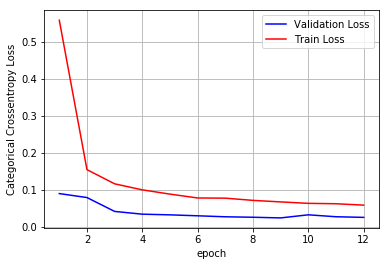

In [24]:
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history2.history['val_loss']
ty = history2.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>7 Hidden layer with few Convolution layers having 5x5 kernel Maxpooling,batch normalization and dropout

In [2]:
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=5,input_shape=(28, 28, 1), activation = 'relu',padding='same'))
model3.add(Conv2D(32, kernel_size=5, activation = 'relu',padding='same'))
model3.add(MaxPooling2D(2,2))
model3.add(BatchNormalization())
model3.add(Dropout(0.4))
model3.add(Conv2D(64, kernel_size=5,activation = 'relu',padding='same'))
model3.add(Conv2D(64, kernel_size=5,activation = 'relu',padding='same'))
model3.add(MaxPooling2D(2,2))
model3.add(BatchNormalization())
model3.add(Dropout(0.4))
model3.add(Conv2D(64, kernel_size=3, activation = 'relu',padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(64, kernel_size=5,activation = 'relu',padding='same'))
model3.add(Conv2D(64, kernel_size=5,activation = 'relu',padding='same'))
model3.add(MaxPooling2D(2,2))
model3.add(BatchNormalization())
model3.add(Dropout(0.4))
model3.add(Flatten())
model3.add(Dense(256, activation = "relu"))
model3.add(Dropout(0.4))
model3.add(Dense(128, activation = "relu"))
model3.add(Dropout(0.4))
model3.add(Dense(10,activation = "softmax"))
model3.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
history3=model3.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(x_test, y_test))









Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 753s 13ms/step - loss: 0.3855 - acc: 0.8812 - val_loss: 0.1245 - val_acc: 0.9727
Epoch 2/12
60000/60000 [==============================] - 753s 13ms/step - loss: 0.0928 - acc: 0.9753 - val_loss: 0.0381 - val_acc: 0.9909
Epoch 3/12
60000/60000 [==============================] - 749s 12ms/step - loss: 0.0682 - acc: 0.9823 - val_loss: 0.0392 - val_acc: 0.9906
Epoch 4/12
60000/60000 [==============================] - 753s 13ms/step - loss: 0.0550 - acc: 0.9859 - val_loss: 0.0270 - val_acc: 0.9927
Epoch 5/12
60000/60000 [==============================] - 757s 13ms/step - loss: 0.0474 - acc: 0.9872 - val_loss: 0.0272 - val_acc: 0.9930
Epoch 6/12
60000/60000 [==============

Test loss: 0.026654037279491352
Test accuracy: 0.994
Test loss: 0.026654037279491352
Test accuracy: 0.994


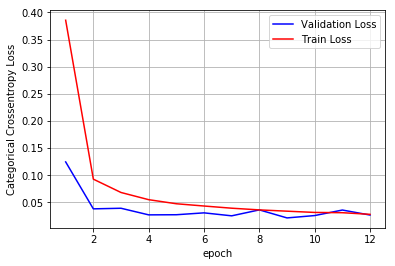

In [3]:
%matplotlib inline
score3 = model3.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:',score3[1])
score5 = model3.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:',score3[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history3.history['val_loss']
ty = history3.history['loss']
plt_dynamic(x, vy, ty, ax)

<h1> 3x3 kernel and 3 layered CNN using SGD

In [16]:
model4 = Sequential()
model4.add(Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape=input_shape))   
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.5))
model4.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))   
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.5))
model4.add(Conv2D(64,kernel_size=(3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.5))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(num_classes, activation='softmax'))
model4.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.SGD(),metrics=['accuracy'])
history4=model4.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score4 = model4.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:',score4[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 35s 579us/step - loss: 2.3039 - acc: 0.1208 - val_loss: 2.2850 - val_acc: 0.1296
Epoch 2/12
60000/60000 [==============================] - 33s 553us/step - loss: 2.2594 - acc: 0.1727 - val_loss: 2.2200 - val_acc: 0.2691
Epoch 3/12
60000/60000 [==============================] - 33s 552us/step - loss: 2.1491 - acc: 0.2389 - val_loss: 2.0214 - val_acc: 0.4171
Epoch 4/12
60000/60000 [==============================] - 33s 553us/step - loss: 1.9716 - acc: 0.2998 - val_loss: 1.7714 - val_acc: 0.5206
Epoch 5/12
60000/60000 [==============================] - 33s 555us/step - loss: 1.7928 - acc: 0.3650 - val_loss: 1.5259 - val_acc: 0.6355
Epoch 6/12
60000/60000 [==============================] - 33s 557us/step - loss: 1.6274 - acc: 0.4280 - val_loss: 1.2840 - val_acc: 0.7025
Epoch 7/12
60000/60000 [==============================] - 34s 563us/step - loss: 1.4735 - acc: 0.4881 - val_loss: 1.

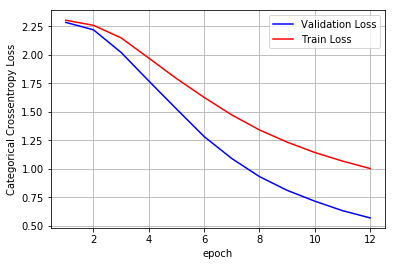

In [18]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history4.history['val_loss']
ty = history4.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 3x3 kernel and 3 layered CNN using SGD with sigmoid activation

In [10]:
model5 = Sequential()
model5.add(Conv2D(16, kernel_size=(3, 3),activation='sigmoid',input_shape=input_shape))   
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.5))
model5.add(Conv2D(32, kernel_size=(3, 3),activation='sigmoid',input_shape=input_shape))   
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.5))
model5.add(Conv2D(64,kernel_size=(3, 3), activation='sigmoid'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.5))
model5.add(Flatten())
model5.add(Dense(128, activation='sigmoid'))
model5.add(Dropout(0.5))
model5.add(Dense(num_classes, activation='softmax'))
model5.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.SGD(),metrics=['accuracy'])
history5=model5.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 35s 576us/step - loss: 2.4994 - acc: 0.0986 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 34s 559us/step - loss: 2.4312 - acc: 0.1008 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 3/12
60000/60000 [==============================] - 34s 563us/step - loss: 2.3915 - acc: 0.1032 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 4/12
60000/60000 [==============================] - 34s 569us/step - loss: 2.3706 - acc: 0.1011 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 5/12
60000/60000 [==============================] - 34s 573us/step - loss: 2.3555 - acc: 0.1017 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 6/12
60000/60000 [==============================] - 35s 576us/step - loss: 2.3454 - acc: 0.1017 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 7/12
60000/60000 [==============================] - 34s 561us/step - loss: 2.3385 - acc: 0.0988 - val_loss: 2.

Test loss: 2.3016598129272463
Test accuracy: 0.1135


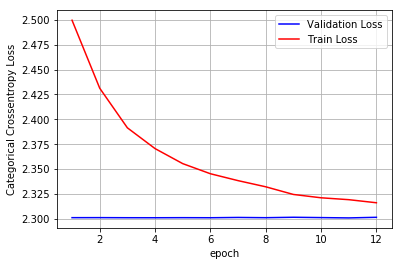

In [11]:
%matplotlib inline
score5 = model5.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score5[0])
print('Test accuracy:',score5[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history5.history['val_loss']
ty = history5.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>CNN using 3x3 kernel matrix with tanh activation function

In [12]:
model6 = Sequential()
model6.add(Conv2D(16, kernel_size=(3, 3),activation='tanh',input_shape=input_shape))   
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.4))
model6.add(Conv2D(32, kernel_size=(3, 3),activation='tanh',input_shape=input_shape))   
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.4))
model6.add(Conv2D(64,kernel_size=(3, 3), activation='tanh'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.4))
model6.add(Flatten())
model6.add(Dense(128, activation='tanh'))
model6.add(Dropout(0.4))
model6.add(Dense(num_classes,activation='softmax'))
model6.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.SGD(),metrics=['accuracy'])
history6=model6.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 35s 585us/step - loss: 2.2758 - acc: 0.1549 - val_loss: 2.1005 - val_acc: 0.4533
Epoch 2/12
60000/60000 [==============================] - 34s 571us/step - loss: 1.8721 - acc: 0.3560 - val_loss: 1.2667 - val_acc: 0.6533
Epoch 3/12
60000/60000 [==============================] - 34s 564us/step - loss: 1.3745 - acc: 0.5362 - val_loss: 0.7960 - val_acc: 0.7830
Epoch 4/12
60000/60000 [==============================] - 35s 576us/step - loss: 1.1018 - acc: 0.6370 - val_loss: 0.6015 - val_acc: 0.8308
Epoch 5/12
60000/60000 [==============================] - 34s 571us/step - loss: 0.9419 - acc: 0.6955 - val_loss: 0.4868 - val_acc: 0.8626
Epoch 6/12
60000/60000 [==============================] - 34s 564us/step - loss: 0.8325 - acc: 0.7336 - val_loss: 0.4111 - val_acc: 0.8833
Epoch 7/12
60000/60000 [==============================] - 34s 567us/step - loss: 0.7535 - acc: 0.7624 - val_loss: 0.

Test loss: 2.3016598129272463
Test accuracy: 0.1135


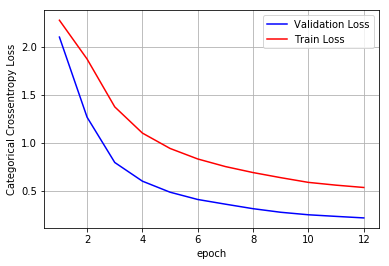

In [13]:
%matplotlib inline
score5 = model5.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score5[0])
print('Test accuracy:',score5[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history6.history['val_loss']
ty = history6.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>3x3 kernel and 3 layered CNN using adam with ReLu activation




In [21]:
model7 = Sequential()
model7.add(Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape=input_shape))   
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.5))
model7.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))   
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.5))
model7.add(Conv2D(64,kernel_size=(3, 3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.5))
model7.add(Flatten())
model7.add(Dense(128, activation='relu'))
model7.add(Dropout(0.5))
model7.add(Dense(num_classes, activation='softmax'))
model7.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.adam(),metrics=['accuracy'])
history7=model7.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score7 = model7.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score7[0])
print('Test accuracy:',score7[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 36s 599us/step - loss: 1.3935 - acc: 0.5110 - val_loss: 0.3910 - val_acc: 0.9075
Epoch 2/12
60000/60000 [==============================] - 35s 578us/step - loss: 0.6644 - acc: 0.7954 - val_loss: 0.2165 - val_acc: 0.9438
Epoch 3/12
60000/60000 [==============================] - 35s 580us/step - loss: 0.5280 - acc: 0.8407 - val_loss: 0.1685 - val_acc: 0.9521
Epoch 4/12
60000/60000 [==============================] - 35s 583us/step - loss: 0.4550 - acc: 0.8631 - val_loss: 0.1437 - val_acc: 0.9585
Epoch 5/12
60000/60000 [==============================] - 34s 574us/step - loss: 0.4220 - acc: 0.8742 - val_loss: 0.1288 - val_acc: 0.9629
Epoch 6/12
60000/60000 [==============================] - 35s 579us/step - loss: 0.3945 - acc: 0.8829 - val_loss: 0.1206 - val_acc: 0.9659
Epoch 7/12
60000/60000 [==============================] - 35s 576us/step - loss: 0.3671 - acc: 0.8907 - val_loss: 0.

Test loss: 2.3016598129272463
Test accuracy: 0.1135


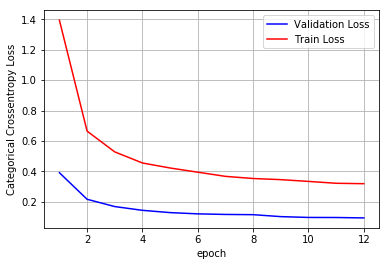

In [22]:
%matplotlib inline
score7 = model7.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score7[0])
print('Test accuracy:',score7[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.history we will have a list of length equal to number of epochs
vy = history7.history['val_loss']
ty = history7.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 3x3  + 3 layered + Adam + sigmoid + dropout

In [5]:
model8 = Sequential()
model8.add(Conv2D(16, kernel_size=(3, 3),activation='sigmoid',input_shape=input_shape))   
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.5))
model8.add(Conv2D(32, kernel_size=(3, 3),activation='sigmoid',input_shape=input_shape))   
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.5))
model8.add(Conv2D(64,kernel_size=(3, 3), activation='sigmoid'))
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.5))
model8.add(Flatten())
model8.add(Dense(128, activation='sigmoid'))
model8.add(Dropout(0.5))
model8.add(Dense(num_classes, activation='softmax'))
model8.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.adam(),metrics=['accuracy'])
history8=model8.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score8 = model8.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score8[0])
print('Test accuracy:',score8[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 30s 500us/step - loss: 2.3539 - acc: 0.1020 - val_loss: 2.3016 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 29s 486us/step - loss: 2.3058 - acc: 0.1068 - val_loss: 2.3014 - val_acc: 0.1135
Epoch 3/12
60000/60000 [==============================] - 29s 485us/step - loss: 2.3027 - acc: 0.1090 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 4/12
60000/60000 [==============================] - 29s 488us/step - loss: 2.3023 - acc: 0.1112 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 5/12
60000/60000 [==============================] - 29s 485us/step - loss: 2.3018 - acc: 0.1102 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 6/12
60000/60000 [==============================] - 29s 484us/step - loss: 2.3018 - acc: 0.1116 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 7/12
60000/60000 [==============================] - 29s 489us/step - loss: 2.3015 - acc: 0.1123 - val_loss: 2.

Test loss: 2.301026412200928
Test accuracy: 0.1135


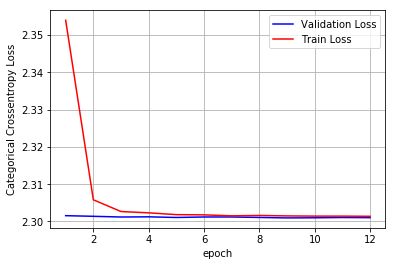

In [6]:
%matplotlib inline
score8 = model8.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score8[0])
print('Test accuracy:',score8[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history8.history['val_loss']
ty = history8.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 3x3  + 3 layered + Adam + tanh + dropout

In [7]:
model9 = Sequential()
model9.add(Conv2D(16, kernel_size=(3, 3),activation='tanh',input_shape=input_shape))   
model9.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Dropout(0.5))
model9.add(Conv2D(32, kernel_size=(3, 3),activation='tanh',input_shape=input_shape))   
model9.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Dropout(0.5))
model9.add(Conv2D(64,kernel_size=(3, 3), activation='tanh'))
model9.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Dropout(0.5))
model9.add(Flatten())
model9.add(Dense(128, activation='tanh'))
model9.add(Dropout(0.5))
model9.add(Dense(num_classes, activation='softmax'))
model9.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.adam(),metrics=['accuracy'])
history9=model9.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score9 = model9.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score9[0])
print('Test accuracy:',score9[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 30s 503us/step - loss: 2.3460 - acc: 0.0995 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 29s 489us/step - loss: 2.3045 - acc: 0.1053 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 3/12
60000/60000 [==============================] - 29s 488us/step - loss: 2.3023 - acc: 0.1108 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 4/12
60000/60000 [==============================] - 29s 486us/step - loss: 2.3020 - acc: 0.1116 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 5/12
60000/60000 [==============================] - 29s 486us/step - loss: 2.3019 - acc: 0.1106 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 6/12
60000/60000 [==============================] - 29s 483us/step - loss: 2.3016 - acc: 0.1115 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 7/12
60000/60000 [==============================] - 29s 485us/step - loss: 2.3017 - acc: 0.1116 - val_loss: 2.

Test loss: 2.3010480514526366
Test accuracy: 0.1135


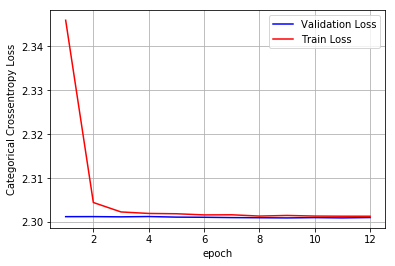

In [8]:
%matplotlib inline
score9 = model9.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score9[0])
print('Test accuracy:',score9[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history9.history['val_loss']
ty = history9.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 3x3 + 3 layered + Adagrad + sigmoid + dropout

In [9]:
model10 = Sequential()
model10.add(Conv2D(16, kernel_size=(3, 3),activation='sigmoid',input_shape=input_shape))   
model10.add(MaxPooling2D(pool_size=(2, 2)))
model10.add(Dropout(0.5))
model10.add(Conv2D(32, kernel_size=(3, 3),activation='sigmoid',input_shape=input_shape))   
model10.add(MaxPooling2D(pool_size=(2, 2)))
model10.add(Dropout(0.5))
model10.add(Conv2D(64,kernel_size=(3, 3), activation='sigmoid'))
model10.add(MaxPooling2D(pool_size=(2, 2)))
model10.add(Dropout(0.5))
model10.add(Flatten())
model10.add(Dense(128,activation='sigmoid'))
model10.add(Dropout(0.5))
model10.add(Dense(num_classes, activation='softmax'))
model10.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adagrad(),metrics=['accuracy'])
history10=model10.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score10 = model10.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score10[0])
print('Test accuracy:',score10[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 30s 508us/step - loss: 2.3334 - acc: 0.1039 - val_loss: 2.3014 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 29s 491us/step - loss: 2.3067 - acc: 0.1052 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 3/12
60000/60000 [==============================] - 29s 490us/step - loss: 2.3048 - acc: 0.1070 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 4/12
60000/60000 [==============================] - 29s 485us/step - loss: 2.3038 - acc: 0.1068 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 5/12
60000/60000 [==============================] - 29s 482us/step - loss: 2.3036 - acc: 0.1061 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 6/12
60000/60000 [==============================] - 29s 484us/step - loss: 2.3029 - acc: 0.1091 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 7/12
60000/60000 [==============================] - 29s 485us/step - loss: 2.3027 - acc: 0.1084 - val_loss: 2.

Test loss: 2.3010630470275877
Test accuracy: 0.1135


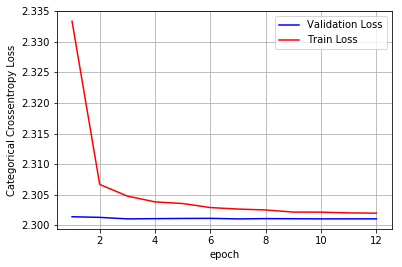

In [10]:
%matplotlib inline
score10 = model10.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score10[0])
print('Test accuracy:',score10[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history10.history['val_loss']
ty = history10.history['loss']
plt_dynamic(x, vy, ty, ax)

In [12]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Hiddden layers", "kernel size",'activation function','optimizer',"accuracy"]
x.add_row([3,'3*3','relu','adadelta',98.54])
x.add_row([5,'5*5','relu','adadelta', 99.5])
x.add_row([7,'5*5','relu','adadelta', 99.41])
x.add_row([3,'3*3','sigmoid','SGD', 11.35])
x.add_row([3,'3*3','tanh','SGD', 11.35])
x.add_row([3,'3*3','relu','SGD', 87.2])
x.add_row([3,'3*3','sigmoid','adam',11.35])
x.add_row([3,'3*3','tanh','adam', 11.35])
x.add_row([3,'3*3','relu','adam', 97.14])
x.add_row([3,'3*3','sigmoid','adagrad',11.35])
print(x)

+----------------+-------------+---------------------+-----------+----------+
| Hiddden layers | kernel size | activation function | optimizer | accuracy |
+----------------+-------------+---------------------+-----------+----------+
|       3        |     3*3     |         relu        |  adadelta |  98.54   |
|       5        |     5*5     |         relu        |  adadelta |   99.5   |
|       7        |     5*5     |         relu        |  adadelta |  99.41   |
|       3        |     3*3     |       sigmoid       |    SGD    |  11.35   |
|       3        |     3*3     |         tanh        |    SGD    |  11.35   |
|       3        |     3*3     |         relu        |    SGD    |   87.2   |
|       3        |     3*3     |       sigmoid       |    adam   |  11.35   |
|       3        |     3*3     |         tanh        |    adam   |  11.35   |
|       3        |     3*3     |         relu        |    adam   |  97.14   |
|       3        |     3*3     |       sigmoid       |  adagrad 

In [0]:
Conclusion:
  1. 5 layers with relu activation and adadelta optimizer has better the accuracy.
  2.Relu works better than all other activation functions 
  3.Adadelta is best optimizer.
  4.Sigmoid and tanh activation function have bad performances.
  5.SGD  with relu performed betterthan SGD with other activation functions.